# Error of reconstruction

The calibration of camera are not 100% accurate. Thus, the 3d position of points from its projection on several camera are error prone. Here we want to quantify this errors as a function of the 3d position of points

In [4]:
from btracker.io import opencv as opencv_io
from btracker.plot import error_reconstruction
%matplotlib inline
# Load the camera calibration
filename_fullcalib = '/media/bolirev/BOMBUS_SYLV/Calibrations/20180118_checkerboard/calibration.xml'
cameras_calib = opencv_io.load_cameras_calibration(filename_fullcalib)

npoints = 100000
edge_length = 150
gridsize = 25
log10_threshold = -2 

## Full setup error

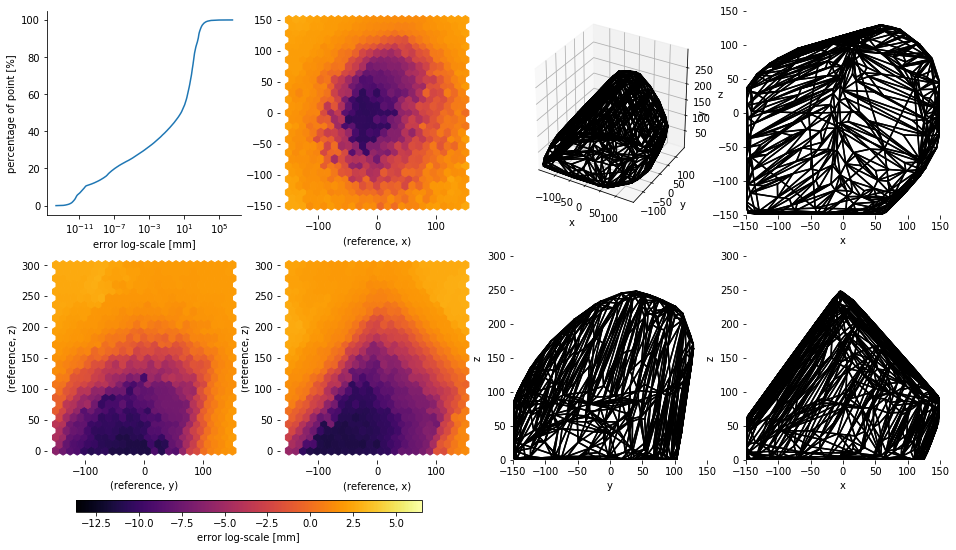

In [3]:
cameras_calib = opencv_io.load_cameras_calibration(filename_fullcalib)
fig,_ = error_reconstruction(npoints, edge_length, cameras_calib, gridsize=gridsize,log10_threshold=log10_threshold)
fig.savefig('error_reconstruction_all_camera.svg')

# Camera pair error

/home/bolirev/.virtualenvs/multicalib/lib/python3.6/site-packages/mcameras-0.1-py3.6.egg/mcameras/triangulate/__init__.py:67: RuntimeWarning: divide by zero encountered in log10
/home/bolirev/.virtualenvs/multicalib/lib/python3.6/site-packages/matplotlib/colors.py:937: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/bolirev/.virtualenvs/multicalib/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


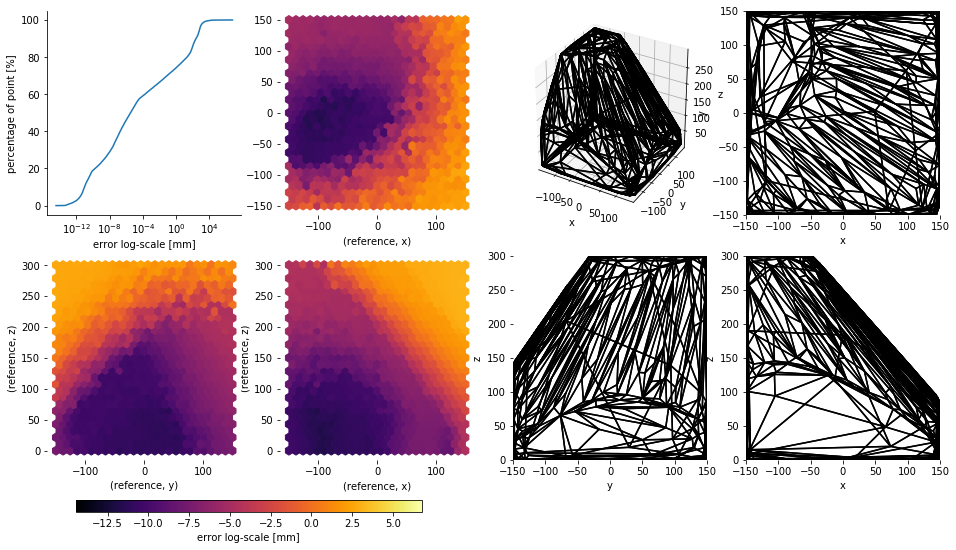

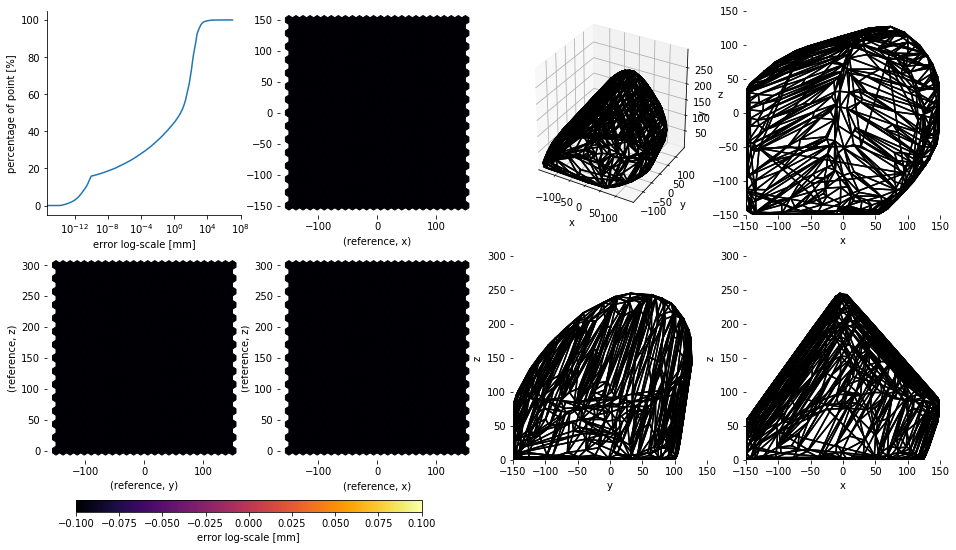

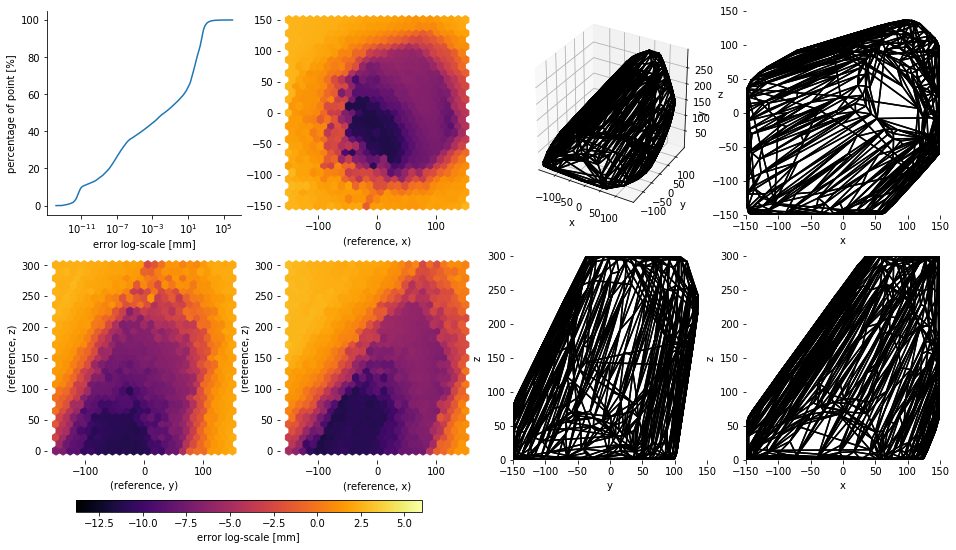

In [5]:
ncameras = len(cameras_calib)
for cam_i in range(ncameras):
    for cam_j in range(cam_i + 1, ncameras):
        pair_camcalib = dict()
        pair_camcalib[0]=cameras_calib[cam_i]
        pair_camcalib[1]=cameras_calib[cam_j]
        fig,_=error_reconstruction(npoints, edge_length, pair_camcalib, gridsize=25)
        fig.savefig('error_reconstruction_camera_{}_{}.svg'.format(cam_i,cam_j))